In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
df = pd.read_pickle('./data/final_df_reducted')

In [13]:
def create_train_window(valores, group_size=20):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(0, len(valores)-group_size-1):
        if(i < (len(valores)-group_size-1)*0.8):
            x_train.append(valores[i:group_size+i])
            y_train.append(valores[i+group_size][-2])
        else:
            x_test.append(valores[i:group_size+i])
            y_test.append(valores[i+group_size][-2])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [14]:
x_train, y_train, x_test, y_test = create_train_window(np.array(df), 40)
input_shape_w=np.shape(x_train[0])
input_shape_w

(40, 15)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=10,            # Number of epochs with no improvement before stopping
    verbose=1,              # Verbosity level (1 for updates, 0 for silent)
    restore_best_weights=True  # Restore the best weights when stopping
)

In [16]:
#Creación MODELO
model = keras.Sequential()
model.add(layers.BatchNormalization())
model.add(layers.LSTM(256, input_shape=input_shape_w, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(128, return_sequences=False, dropout=0, recurrent_dropout=0))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# model.summary()

In [17]:
model.fit(x_train, y_train, shuffle=True, batch_size=32, epochs=50, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/50
300/300 [==============================] - 37s 111ms/step - loss: 0.6634 - accuracy: 0.0000e+00 - val_loss: 0.4735 - val_accuracy: 0.0000e+00
Epoch 2/50
300/300 [==============================] - 32s 107ms/step - loss: 0.5784 - accuracy: 0.0000e+00 - val_loss: 0.4408 - val_accuracy: 0.0000e+00
Epoch 3/50
300/300 [==============================] - 32s 107ms/step - loss: 0.5034 - accuracy: 0.0000e+00 - val_loss: 0.3963 - val_accuracy: 0.0000e+00
Epoch 4/50
300/300 [==============================] - 33s 110ms/step - loss: 0.4533 - accuracy: 0.0000e+00 - val_loss: 0.3377 - val_accuracy: 0.0000e+00
Epoch 5/50
300/300 [==============================] - 32s 105ms/step - loss: 0.4372 - accuracy: 0.0000e+00 - val_loss: 0.3893 - val_accuracy: 0.0000e+00
Epoch 6/50
300/300 [==============================] - 31s 105ms/step - loss: 0.4312 - accuracy: 0.0000e+00 - val_loss: 0.3127 - val_accuracy: 0.0000e+00
Epoch 7/50
300/300 [==============================] - 32s 108ms/step - loss: 0.418

In [18]:
y_prediction = model.predict(x_test)
print(mean_absolute_error(y_test,y_prediction))
print(mean_squared_error(y_test,y_prediction))

108/108 [==============================] - 4s 27ms/step
0.3981494137695597
0.3591345705941275


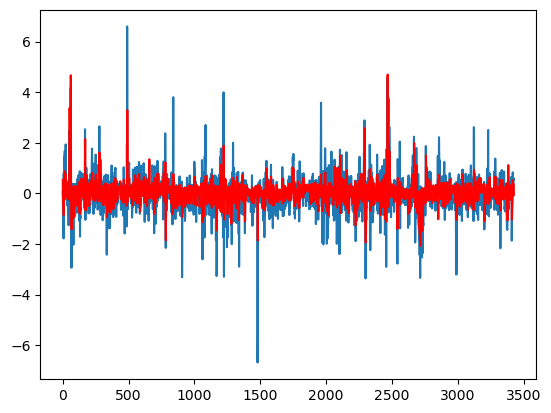

In [19]:
plt.plot(y_test)
plt.plot(y_prediction,c='r')

In [20]:
y_test

array([ 0.08221663, -0.36619494, -0.50219477, ...,  0.38621227,
        0.60824823,  0.54367226])